In [14]:
import h5py
import numpy as np
import hdf5plugin
import matplotlib.pyplot as plt

In [6]:
path = "C:/Users/schiavaz/lava-nc/depth/"
dataset = "data/vector/"
filename = "board_slow1.synced.left_event.hdf5"
id_start = 0
id_end = 110000000

In [7]:
with h5py.File(dataset + filename, "r+") as f:
    print("Keys: %s" % f.keys())
    print(f["events"].keys())
    events =  f["events"]
    t = events.get("t")[id_start:id_end]
    x = events.get("x")[id_start:id_end]
    y = events.get("y")[id_start:id_end]
    p = events.get("p")[id_start:id_end]

Keys: <KeysViewHDF5 ['events', 'ms_to_idx', 't_offset']>
<KeysViewHDF5 ['p', 't', 'x', 'y']>


In [8]:
t = t * 1e-6
print(t.shape)

(28743782,)


In [9]:
events_np = np.zeros((t.shape[0], 4))

In [10]:
events_np[:, 0] = t
events_np[:, 1] = x
events_np[:, 2] = y
events_np[:,3] = p

In [16]:
events_np.shape

(28743782, 4)

In [55]:
img = np.zeros((480, 640))
s = 11500000
for e in events_np[s:s+100000]:
    x = int(e[1])
    y = int(e[2])
    
    img[y, x] = e[0]

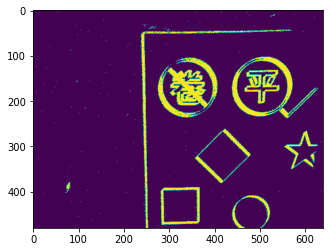

In [56]:
plt.imshow(img)

In [19]:
np.savetxt(path + dataset + "events.txt", events_np, fmt="%.9f %d %d %d")

In [20]:
events_np.shape

(28743782, 4)

In [21]:
poses = np.loadtxt(path + dataset + "board_slow1.synced.gt.txt")

In [22]:
poses.shape

(4171, 8)

In [23]:
# poses[:, 0] -= np.min(poses[:, 0])

In [24]:
np.savetxt(path + dataset + "groundtruth.txt", poses, fmt="%.9f %.9f %.9f %.9f %.9f %.9f %.9f %.9f")

In [58]:
events_np[-1, 0]

34.730844